In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

In [3]:
# Filter the dataset for binary classification: Setosa vs Versicolour (Classes 0 and 1)
df = df[df['target'] < 2]

In [4]:
X = df.drop('target', axis=1)  # Features
y = df['target']  # Target variable

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Train the logistic regression model
model = LogisticRegression(max_iter=200)  # Increasing max_iter in case the dataset does not converge with the default value
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [8]:
# Make predictions
y_pred = model.predict(X_test)

In [9]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[12  0]
 [ 0  8]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Accuracy: 1.0


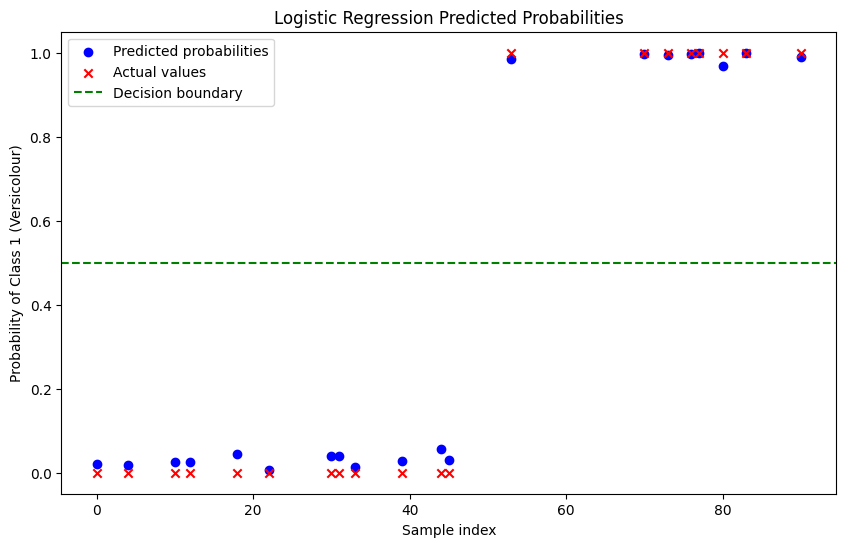

In [12]:
# Predict the probabilities for the test data
probs = model.predict_proba(X_test)[:, 1]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test.index, probs, color='blue', label='Predicted probabilities')
plt.scatter(X_test.index, y_test, color='red', marker='x', label='Actual values')
plt.axhline(y=0.5, color='green', linestyle='--', label='Decision boundary')
plt.title('Logistic Regression Predicted Probabilities')
plt.xlabel('Sample index')
plt.ylabel('Probability of Class 1 (Versicolour)')
plt.legend()
plt.show()